In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,9/25/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,11/20/2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,7/1/2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,11/1/2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,1/11/2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# B. Khám phá dữ liệu

# C. Khám phá mối quan hệ trong dữ liệu

### Movie type

#### a) Lý do chọn biểu đồ

đang làm

#### b) Biểu đồ

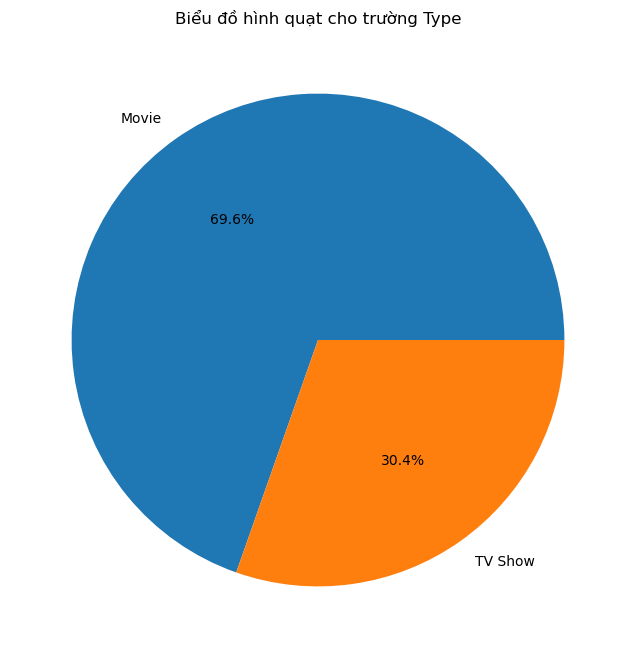

In [8]:
# Tính toán số lượng mỗi loại
type_counts = df['type'].value_counts()

# Vẽ biểu đồ hình quạt
plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Biểu đồ hình quạt cho trường Type')
plt.show()


### Release Year

#### a) Lý do chọn biểu đồ

đang làm

#### b) Biểu đồ

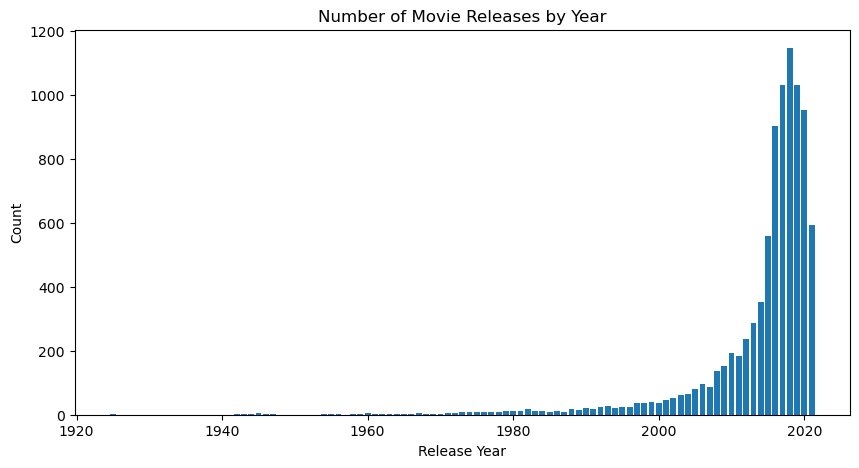

In [9]:
# Tính số lượng phát hành theo năm
release_counts = df['release_year'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,5))
plt.bar(release_counts.index, release_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movie Releases by Year')
plt.show()


### Rating

### Country?

### Listed_in?

### Liên hệ giữa Type và Duration